# Лабораторная работа 337н «Спектры импульсных сигналов»
Задания к выполнению (с обработкой в Python)

Радиофизическая лаборатория, ФРКТ МФТИ

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#       plt.show()

<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_19620/1103258873.py:46: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$x(k\Delta t)w[k]$, В")


## Пример запуска

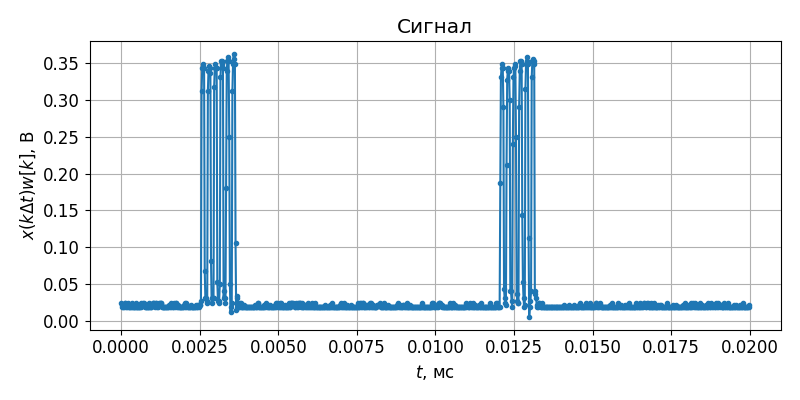

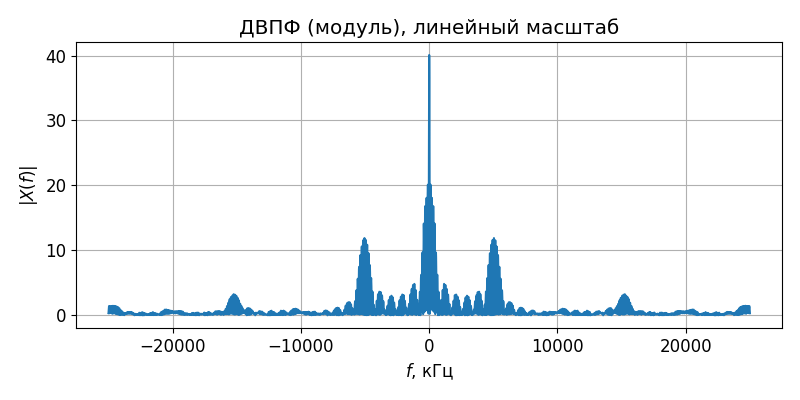

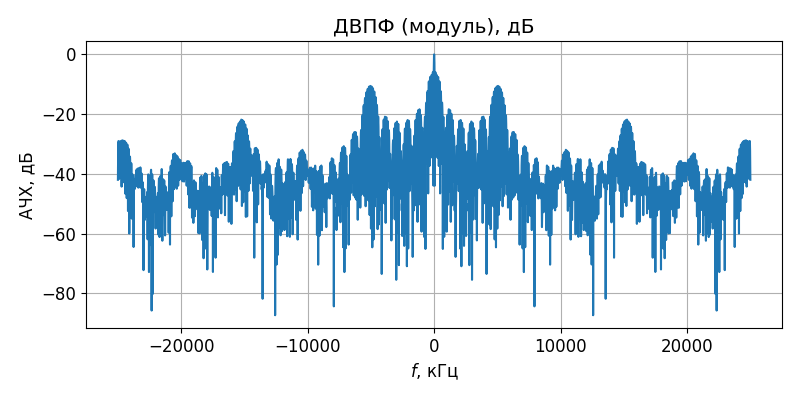

In [3]:
analyse(file='3-2.txt', const_level=-0.04, window='boxcar')

##  Подготовка макета к работе
Подключить осциллограф к компьютеру. В управляющей программе провести синхронизацию нуля при отключённых щупах от BNC разъемах осциллографа. Установить следующие настройки в управляющей программе цифрового осциллографа.
* Число выборок 1000, режим (пиковый детектор или нормальный) — нормальный. 
* Размерность ДПФ 8192, весовое окно – прямоугольное. 
* Пробник х1 (1:1).
* В настройках синхронизации выбрать «вкл.», «внешняя», по восходящему фронту. 
Подключить с помощью коаксиального кабеля с разъемами BNC–BNC вход осциллографа с разъемом «к осциллографу» на плате. С помощью коаксиального кабеля BNC – штекеры соединить вход внешней синхронизации осциллографа с выходом встроенного генератора на макете. 
Включить перемычку, соединяющую заземление синхронизации с «лог. I».


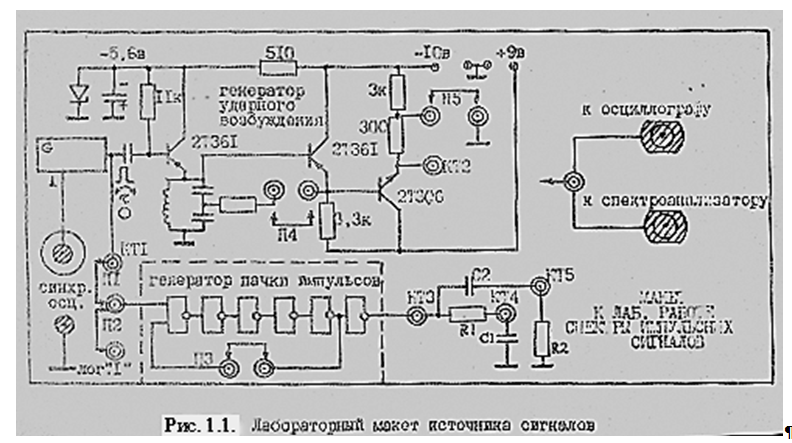

На двух каналах источника питания выставить напряжения 10В и 9В соответственно. Подключить плату к источнику питания, используя обычную полярность для +9В и обратную полярность для -10В  (заземление платы к «+» на источнике, -10В к «-» на источнике).

Рекомендуемая размерность ДПФ для обработки в Python  $N_{FFT}=2^{18}$.

Изменения для отрезков синусоид производить с закрытым входом осциллографа, а для импульсов вычесть постоянную составляющую (если она есть) так, чтобы потенциал соответствует нулю в момент, когда импульс не действует.


In [ ]:
df = pd.DataFrame({"Вариант": [u for u in range(1, 13, 1)],
              "${{n}_{1}}$" : [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6],
            "${{n}_{2}}$" : [10, 12, 14, 15, 10, 12, 14, 15, 10, 12, 14, 15]}).T


In [ ]:
df.style.hide(axis="columns").set_properties(**{"text-align": "left"})

Вариант,1,2,3,4,5,6,7,8,9,10,11,12
${{n}_{1}}$,4,5,6,4,5,6,4,5,6,4,5,6
${{n}_{2}}$,10,12,14,15,10,12,14,15,10,12,14,15


## Задание 1. Спектр отрезка синусоиды.
### Практическая часть (макет).

1.1) Подключить осциллограф с помощью перемычки к разъему КТ2 – выходу генератора ударного возбуждения. Включить перемычку П4 в генераторе ударного возбуждения макета. Настроить временной диапазон и диапазон амплитуд в управляющей программе осциллографа так, чтобы наблюдался один радиоимпульс (примерные диапазоны 1uS и 100mV).  Возможно, для этого потребуется изменять длительность импульсов $\tau $ на встроенном генераторе схемы (с помощью поворотной ручки), выбрать нужно положение нуля потенциала в управляющей программе. 

1.2) Включить режим отображения БПФ (Ctrl+F). Изменяя с помощью поворотной ручки длительность импульса на генераторе, пронаблюдать за изменением осциллограммы сигнала и оценки спектра. Установить (качественно), как изменяется ширина главного лепестка при увеличении числа наблюдаемых периодов синусоиды. 

1.3) Варьируя длительность импульса на генераторе, получить осциллограммы сигналов с числом периодов синуса $n_1$ и $n_2$. Сохранить выборки в текстовый файл для дальнейшей обработки с Python. 

1.4) Включить перемычку П5. Повторить действия из предыдущего пункта. 

### Обработка измерений в Python.

1.5) Для каждого из сигналов из п. 1.3 построить оценку спектра с помощью ДВПФ для последовательности выборок. 
По графикам заполнить таблицу.

In [ ]:
dict1 = {}
dict1["$n_1$"]= {"Ширина главного лепестка на уровне $-3\; дБ$  в кГц ":"750",
"Ширина главного лепестка на уровне $-6\; дБ$  в кГц": "1018", 
"Уровни первых боковых лепестков (левого и правого) относительно главного в дБ": "-12, -14",
"Оценка частоты синусоиды по положению главного максимума, кГц" : "5100"}

dict1["$n_2$"]= {"Ширина главного лепестка на уровне $-3\; дБ$  в кГц ":"330",
"Ширина главного лепестка на уровне $-6\; дБ$  в кГц": "450", 
"Уровни первых боковых лепестков (левого и правого) относительно главного в дБ": "-13.16, -13",
"Оценка частоты синусоиды по положению главного максимума, кГц" : "5116"}
df = pd.DataFrame(dict1)
df.T

<>:2: SyntaxWarning: invalid escape sequence '\;'
<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:7: SyntaxWarning: invalid escape sequence '\;'
<>:8: SyntaxWarning: invalid escape sequence '\;'
<>:2: SyntaxWarning: invalid escape sequence '\;'
<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:7: SyntaxWarning: invalid escape sequence '\;'
<>:8: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_35010/2005155213.py:2: SyntaxWarning: invalid escape sequence '\;'
  dict1["$n_1$"]= {"Ширина главного лепестка на уровне $-3\; дБ$  в кГц ":"750",
/tmp/ipykernel_35010/2005155213.py:3: SyntaxWarning: invalid escape sequence '\;'
  "Ширина главного лепестка на уровне $-6\; дБ$  в кГц": "1018",
/tmp/ipykernel_35010/2005155213.py:7: SyntaxWarning: invalid escape sequence '\;'
  dict1["$n_2$"]= {"Ширина главного лепестка на уровне $-3\; дБ$  в кГц ":"330",
/tmp/ipykernel_35010/2005155213.py:8: SyntaxWarning: invalid escape sequence '\;'
  "Ширина главного лепестка на уровне $-6\; д

,Ширина главного лепестка на уровне $-3\; дБ$ в кГц,Ширина главного лепестка на уровне $-6\; дБ$ в кГц,Уровни первых боковых лепестков (левого и правого) относительно главного в дБ,"Оценка частоты синусоиды по положению главного максимума, кГц"
$n_1$,750,1018,"-12, -14",5100
$n_2$,330,450,"-13.16, -13",5116


1.6) Записать аналитические формулы для спектра отрезка синусоиды и сравнить их с графиками оценки спектра. 
1.7) Сравнить графики для оценки спектра в п. 1.4 с теми, которые получаются в п. 1.3.

## Задание 2. Спектр прямоугольной оконной функции.
### Практическая часть (макет).
2.1) Включить перемычку П1, оставив выключенными перемычки П3 и П5. Уставить длительность импульсов такой, чтобы в КТ2 наблюдалось $n_1$ периодов синусоиды. Снять осциллограмму сигнала в точке КТ3. Сохранить данные в текстовый файл. 
Повторить для ${{n}_{2}}$ периодов синусоиды. Изменяя период импульсов на генераторе, пронаблюдать с помощью встроенного спектроанализатора  управляющей программы, как изменяется (и изменяется ли) ширина главного лепестка и уровень боковых лепестков в дБ относительно главного. 

### Обработка измерений в Python.
2.2) Для каждого из сигналов из п. 2.1 построить оценку спектра с помощью ДВПФ для последовательности выборок. 
По графикам заполнить таблицу.

In [ ]:
dict2 = {}
dict2["$n_1$"]= {"Ширина главного лепестка окна на уровне $-3\; дБ$   в кГц ":"402*2 = 804",
"Ширина главного лепестка окна на уровне $-6\; дБ$  в кГц": "543*2 = 1086", 
"Уровень первого бокового лепестка окна относительно главного в дБ": "-13.3"}

dict2["$n_2$"]= {"Ширина главного лепестка окна на уровне $-3\; дБ$   в кГц ":"164*2 = 328",
"Ширина главного лепестка окна на уровне $-6\; дБ$  в кГц": "224*2 = 448 ", 
"Уровень первого бокового лепестка окна относительно главного в дБ": "-13.4"}
df = pd.DataFrame(dict2)
df.T

<>:2: SyntaxWarning: invalid escape sequence '\;'
<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:6: SyntaxWarning: invalid escape sequence '\;'
<>:7: SyntaxWarning: invalid escape sequence '\;'
<>:2: SyntaxWarning: invalid escape sequence '\;'
<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:6: SyntaxWarning: invalid escape sequence '\;'
<>:7: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_35010/638671018.py:2: SyntaxWarning: invalid escape sequence '\;'
  dict2["$n_1$"]= {"Ширина главного лепестка окна на уровне $-3\; дБ$   в кГц ":"402*2 = 804",
/tmp/ipykernel_35010/638671018.py:3: SyntaxWarning: invalid escape sequence '\;'
  "Ширина главного лепестка окна на уровне $-6\; дБ$  в кГц": "543*2 = 1086",
/tmp/ipykernel_35010/638671018.py:6: SyntaxWarning: invalid escape sequence '\;'
  dict2["$n_2$"]= {"Ширина главного лепестка окна на уровне $-3\; дБ$   в кГц ":"164*2 = 328",
/tmp/ipykernel_35010/638671018.py:7: SyntaxWarning: invalid escape sequence '\;'
  "Ширин

,Ширина главного лепестка окна на уровне $-3\; дБ$ в кГц,Ширина главного лепестка окна на уровне $-6\; дБ$ в кГц,Уровень первого бокового лепестка окна относительно главного в дБ
$n_1$,402*2 = 804,543*2 = 1086,-13.3
$n_2$,164*2 = 328,224*2 = 448,-13.4


2.3) Получить аналитическую формулу для спектра оконной функции. Сравнить АЧХ окна с результатом, полученным при обработке реальных данных.  

## Задание 3. Спектр пачки прямоугольных импульсов. 
3.1) Установить перемычки П1 и П3. Снять осциллограмму сигнала в КТ3, установив длительность такой, чтобы наблюдалась пачка из ${{n}_{1}}$прямоугольных импульсов. Сохранить выборки в текстовый файл для дальнейшей обработки в Python. 

3.2*) Получить осциллограмму спектра пачки пачек импульсов, установив для 3.1 соответствующую временную развёртку. 

3.3) Снять осциллограмму сигнала в КТ1, установив  временную развертку такой, чтобы на экране было видно несколько прямоугольных импульсов (от 3 до 10). Сохранить выборки в текстовый файл для дальнейшей обработки в Python.

### Обработка измерений в Python.
3.4) Получить аналитические формулы для спектра пачки прямоугольных импульсов в п. 3.1, 3.2*,  3.3. 

3.5) Построить оценки спектра с помощью ДВПФ для 3.1, 3.2*, 3.3. Сравнить аналитические формулы с оценкой спектра в линейном масштабе. 

3.6) Для п. 3.2 по оценке спектра оценить длительность импульсов и их интервал следования по оценке спектра сигнала и сравнить с реальными значениями по осциллограмме. 

In [ ]:
analyse(file='3-1_n1_KT3.txt', const_level=-0.022, window='boxcar')
print(f'Длительность импульсов = {0.001} us, интервал следования = {0_0} (3.1)')
print(f'Длительность импульсов = {1/52} ms, интервал следования = {1/10000} (3.2) ms')
print(f'Длительность импульсов = {1/22} ms, интервал следования = {1/9000} (3.3) ms')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Длительность импульсов = 0.001 us, интервал следования = 0 (3.1)
Длительность импульсов = 0.019230769230769232 ms, интервал следования = 0.0001 (3.2) ms
Длительность импульсов = 0.045454545454545456 ms, интервал следования = 0.00011111111111111112 (3.3) ms


## Задание 4* (на оценку отлично). Сумма двух отрезков синусоид. 

С помощью двух генераторов и сумматора на резисторах пронаблюдать сигнал суммы двух низкочастотных синусоид с близкими частотами. Варьировать тип оконной функции. Сделать вывод о различимости спектральных компонент. 
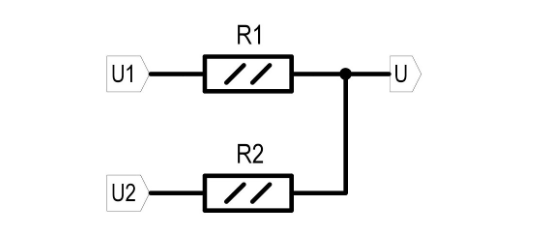

In [ ]:
N = 1000
Fsmpl = 1e6 #Hz
df_6 = 1.2/N*Fsmpl
df_3 = 0.89/N*Fsmpl
df_6

1200.0

In [ ]:
analyse(file='Close_Sin_Waves/df_7000Hz.txt', const_level=-0.022, window='boxcar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>